In [1]:
'''

Carga y muestreo de datos
Temario: Intervenciones de seguirdad vial y los reclamos que se obtuvieron de estas mismas.

'''


'\n\nCarga y muestreo de datos\nTemario: Intervenciones de seguirdad vial y los reclamos que se obtuvieron de estas mismas.\n\n'

In [2]:
#Abstract Dataset
'''
Este dataset muestra los accidentes viales y los reclamos que se produjeron en Buenos Aires desde Enero 2014 hasta Marzo 2022.
Indicando la fecha y la hora exacta donde se produjo  el accidente, el autopista, la altura, la banda  y/o ramal del lugar de dicho accidente, el clima, y el estado de la ruta (ej: seca, mojada) del mismo, la cantidad de lesionados, la cantidad de fallecidos, el tipo de accidente (por ejemplo: choque entre 2 autos, o choque de un camion con una moto, entre otros) y por ultimo cuales fueron los protagonistas (moto, auto, bus, entre otros).
Los relcamos tienen un nro de reclamo, una fecha y un nombre/titulo del reclamo.
Basicamente lo que queremos lograr con estos datos, es realizar un analisis especifico para obtener resultados como por ejemplo: 
    - Cual es el tipo de vehiculo que en mas accidentes participa
    - Cual es la cantidad de fallecidos o de lesionados por un accidente con un vehiculo especifico
    - Cual es la hora donde mas accidentes ocurren
    - Cual es la cantidad de fallecidos / lesionados dependiendo del clima
'''


'\nEste dataset muestra los accidentes viales y los reclamos que se produjeron en Buenos Aires desde Enero 2014 hasta Marzo 2022.\nIndicando la fecha y la hora exacta donde se produjo  el accidente, el autopista, la altura, la banda  y/o ramal del lugar de dicho accidente, el clima, y el estado de la ruta (ej: seca, mojada) del mismo, la cantidad de lesionados, la cantidad de fallecidos, el tipo de accidente (por ejemplo: choque entre 2 autos, o choque de un camion con una moto, entre otros) y por ultimo cuales fueron los protagonistas (moto, auto, bus, entre otros).\nLos relcamos tienen un nro de reclamo, una fecha y un nombre/titulo del reclamo.\nBasicamente lo que queremos lograr con estos datos, es realizar un analisis especifico para obtener resultados como por ejemplo: \n    - Cual es el tipo de vehiculo que en mas accidentes participa\n    - Cual es la cantidad de fallecidos o de lesionados por un accidente con un vehiculo especifico\n    - Cual es la hora donde mas accidentes o

In [3]:
import pandas
import statsmodels.regression.linear_model as sm
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.api import add_constant
import statsmodels.api as sm


import os
#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import sklearn # Paquete base de ML
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler


%matplotlib inline

In [4]:
filename = 'intervenciones-de-seguridad-vial.csv'
filename2 = 'reclamos-ausa.xlsx'
data = pandas.read_table(filename, header=0, sep=';')
data2=pandas.read_excel(filename2, header=0)

print('''
            Intervenciones de seguridad vial
    ''')
print(data.shape)
print (data)
print('-'*80)
print('''
            Reclamos AUSA
    ''')
print(data2.shape)
print (data2)

print('-'*80)
totalFallecidos=data['fallecidos'].sum()
print(f'''
        La cantidad total de fallecidos debido a un accidente vial es de: {totalFallecidos}  
    ''')

print('-'*80)

maximaCantMuertos=data['fallecidos'].max()
print(f'''
        La cantidad maxima de fallecidos debido a un accidente vial es de: {maximaCantMuertos}  
    ''')



            Intervenciones de seguridad vial
    
(7579, 14)
          fecha  hora         autopista banda_y_o_ramal    pk  \
0      1/1/2014     1        AU CAMPORA      ASCENDENTE   600   
1      1/1/2014     3     AU DELLEPIANE     DESCENDENTE   600   
2      1/1/2014    22     AU 25 DE MAYO      ASCENDENTE  5900   
3      1/3/2014     7        AU CAMPORA     DESCENDENTE   600   
4      1/3/2014    21  AU PERTIO MORENO     DESCENDENTE  5400   
...         ...   ...               ...             ...   ...   
7574  30/3/2022    12       AV. LUGONES     DESCENDENTE  4500   
7575  30/3/2022    13       AU FRONDIZI     DESCENDENTE  2500   
7576  31/3/2022     8     AU 25 DE MAYO      ASCENDENTE  6600   
7577  31/3/2022    13       AU FRONDIZI      ASCENDENTE  1900   
7578  31/3/2022    17       AV. CANTILO      ASCENDENTE  9700   

     condiciones_meteorologicas superficie_de_la_via  lesionados  fallecidos  \
0                         BUENO                 SECA           1           0 

In [5]:
totalFallecidos=data['fallecidos'].sum()
print(f'''
        La cantidad total de fallecidos debido a un accidente vial es de: {totalFallecidos}  
    ''')

print('-'*80)

maximaCantMuertos=data['fallecidos'].max()
print(f'''
        La cantidad maxima de fallecidos debido a un accidente vial es de: {maximaCantMuertos}  
    ''')



        La cantidad total de fallecidos debido a un accidente vial es de: 72  
    
--------------------------------------------------------------------------------

        La cantidad maxima de fallecidos debido a un accidente vial es de: 3  
    


In [6]:
media=data['fallecidos'].mean()
mediaAcortada=round(media, 4)
print(f'''
        La media de fallecidos debido a un accidente vial es de: {mediaAcortada}  
    ''')

print('-'*80)

#percentil=data['fallecidos'].quantile(0.25)
percentil=data.fallecidos.quantile(0.10)
print(f'''
        El percentil  25 del total de fallecidos debido a un accidente vial es de: {percentil}  
    ''')



        La media de fallecidos debido a un accidente vial es de: 0.0095  
    
--------------------------------------------------------------------------------

        El percentil  25 del total de fallecidos debido a un accidente vial es de: 0.0  
    


In [7]:
df = pandas.DataFrame(data, columns = ['fecha','hora','autopista','banda_y_o_ramal','pk','condiciones_meteorologicas','superficie_de_la_via','lesionados','fallecidos','tipo_de_siniestro','moto','liviano','bus','camion'
])
df

,fecha,hora,autopista,banda_y_o_ramal,pk,condiciones_meteorologicas,superficie_de_la_via,lesionados,fallecidos,tipo_de_siniestro,moto,liviano,bus,camion
0,1/1/2014,1,AU CAMPORA,ASCENDENTE,600,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,1,0,0
1,1/1/2014,3,AU DELLEPIANE,DESCENDENTE,600,BUENO,SECA,0,0,COLISION CON OBSTACULO FIJO,0,1,0,0
2,1/1/2014,22,AU 25 DE MAYO,ASCENDENTE,5900,BUENO,SECA,8,0,COLISION CON DOS O MAS VEHICULOS,0,2,0,0
3,1/3/2014,7,AU CAMPORA,DESCENDENTE,600,BUENO,SECA,0,0,OBSTACULO NO FIJO,0,0,0,1
4,1/3/2014,21,AU PERTIO MORENO,DESCENDENTE,5400,BUENO,SECA,1,0,COLISION CON OBSTACULO FIJO,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7574,30/3/2022,12,AV. LUGONES,DESCENDENTE,4500,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,1,0,0
7575,30/3/2022,13,AU FRONDIZI,DESCENDENTE,2500,BUENO,SECA,2,0,COLISION CON DOS O MAS VEHICULOS,0,3,0,1
7576,31/3/2022,8,AU 25 DE MAYO,ASCENDENTE,6600,BUENO,SECA,1,0,COLISION CON DOS O MAS VEHICULOS,1,2,0,1
7577,31/3/2022,13,AU FRONDIZI,ASCENDENTE,1900,BUENO,SECA,0,0,COLISION CON DOS O MAS VEHICULOS,0,1,1,0


In [8]:
# Elijo los datos a analizar
'''A continuacion se resuelven las hipostesis y los EDA'''

'A continuacion se resuelven las hipostesis y los EDA'

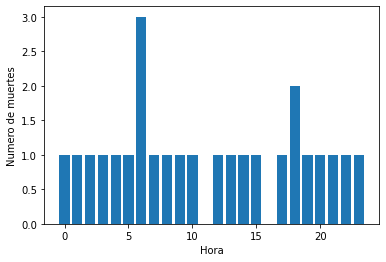

In [9]:

# Variable independiente = hora en la que ocurren los accidentes
# Variable dependiente = fallecidos 

#Cual es la cantidad de fallecidos por hora
plt.bar(df.hora,df.fallecidos)
plt.xlabel('Hora')
plt.ylabel('Numero de muertes')
plt.show()

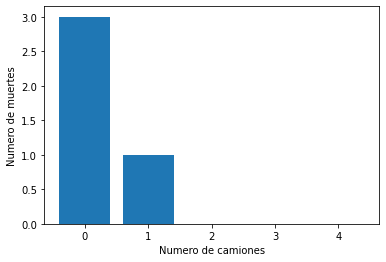

In [10]:
# Elijo los datos a analizar

# Variable independiente = camion 
# Variable dependiente = fallecidos 

#Cual es la cantidad de muertes que manjean camiones
plt.bar(df.camion,df.fallecidos)
plt.xlabel('Numero de camiones')
plt.ylabel('Numero de muertes')
plt.show()

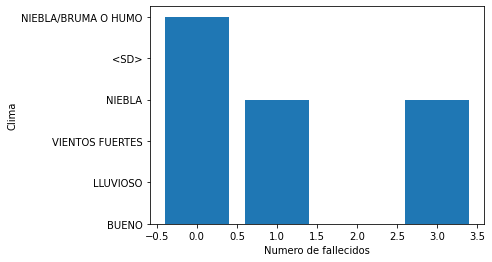

In [11]:
#Cual es la cantidad de fallecidos dependiendo del clima
plt.bar(df['fallecidos'], df['condiciones_meteorologicas'])
plt.xlabel('Numero de fallecidos')
plt.ylabel('Clima')
plt.show()


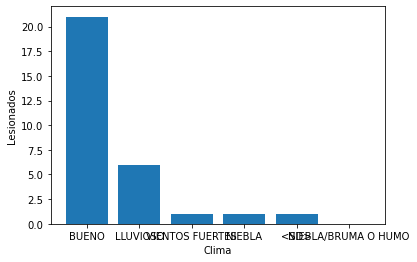

In [12]:
#Cual es la cantidad de lesionados dependiendo del clima
plt.bar(data['condiciones_meteorologicas'], data['lesionados'])

plt.xlabel("Clima")
plt.ylabel("Lesionados")
plt.show()

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fallecidos', ylabel='Density'>

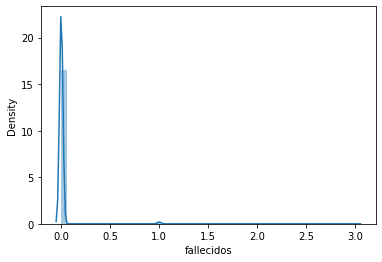

In [13]:
#Diagrama utilizado para ver como se comportan las distribuciones de los fallecidos
sns.distplot(data['fallecidos'])

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hora', ylabel='Density'>

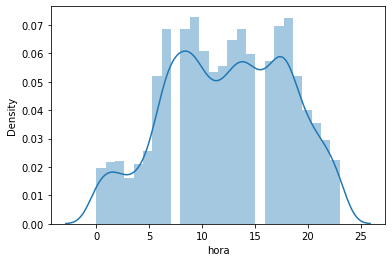

In [14]:
#Diagrama utilizado para ver como se comportan las distribuciones de las horas en las que ocurren los accidentes

sns.distplot(data['hora'])


C:\Users\camicha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fallecidos'>

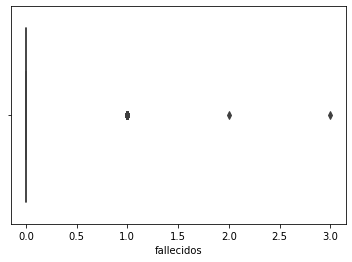

In [15]:
#Informacion sobre el mínimo, el primer cuartil, el medio, el tercer cuartil y los valores máximos de los fallecidos
sns.boxplot(data['fallecidos'])

<AxesSubplot:xlabel='bus', ylabel='Density'>

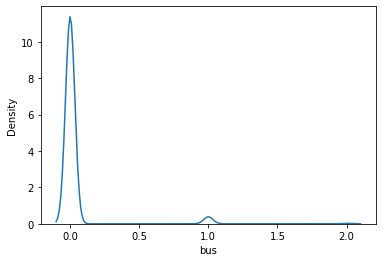

In [16]:
#Distribucion de los autobuses 
sns.kdeplot(df["bus"])

In [17]:
dataF= df[['fecha','hora','condiciones_meteorologicas','fallecidos']]
dataF.head(5)

,fecha,hora,condiciones_meteorologicas,fallecidos
0,1/1/2014,1,BUENO,0
1,1/1/2014,3,BUENO,0
2,1/1/2014,22,BUENO,0
3,1/3/2014,7,BUENO,0
4,1/3/2014,21,BUENO,0


In [18]:
df_muertosClima = df[df['condiciones_meteorologicas'] == 'BUENO']
columnaX =df_muertosClima['hora']

C:\Users\camicha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


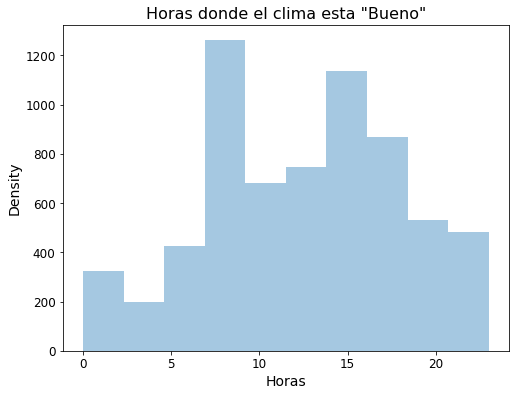

In [19]:
# Dependiendo del clima 
plt.figure(figsize=(8,6))
df_muertosClima = df_muertosClima[df_muertosClima['condiciones_meteorologicas'] == 'BUENO']
columnaX = df_muertosClima['hora']
# Crear la densidad
sns.distplot(columnaX, bins=10, kde=False)
plt.title('Horas donde el clima esta "Bueno"', fontsize=16)
plt.xlabel('Horas', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Density', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [20]:
#Eleccion de metodo de feature selection


totalDeIncidentes=sum(data.lesionados)+sum(data.fallecidos)+sum(data.moto)+sum(data.liviano)+sum(data.bus)+sum(data.camion)
print(f'Hubo una totalidad de: {totalDeIncidentes} incidentes')


totalDeIncidentes2=data[['fallecidos','lesionados','moto','liviano','bus','camion']]
#totalDeIncidentes2=data.lesionados+data.fallecidos+data.moto+data.liviano+data.bus+data.camion
totalDeIncidentesPD=pd.DataFrame(totalDeIncidentes2)
totalDeIncidentesPD['totalDeIncidentes']=totalDeIncidentes
X=totalDeIncidentes2.drop("totalDeIncidentes", 1)    # feature matrix
y=totalDeIncidentes2['totalDeIncidentes']            # target feature
totalDeIncidentesPD.head()

Hubo una totalidad de: 17926 incidentes


C:\Users\camicha\AppData\Local\Temp\ipykernel_1364\239477646.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=totalDeIncidentes2.drop("totalDeIncidentes", 1)    # feature matrix


,fallecidos,lesionados,moto,liviano,bus,camion,totalDeIncidentes
0,0,1,0,1,0,0,17926
1,0,0,0,1,0,0,17926
2,0,8,0,2,0,0,17926
3,0,0,0,0,0,1,17926
4,0,1,0,2,0,0,17926


In [21]:
#Metodo para eliminar columna: Forward selection

def forward_selection(totalDeIncidentesPD, totalDeIncidentes, significance_level=0.01):
    initial_incidentes = totalDeIncidentesPD.columns.tolist()
    lst=list(initial_incidentes)
    best_incidentes = []
    while (len(lst)>0):
        remaining_incidentes = list(set(lst)-set(best_incidentes))
        new_pval = pd.Series(index=remaining_incidentes)
        for new_column in remaining_incidentes:
            model = sm.OLS(totalDeIncidentes.astype(float), sm.add_constant(totalDeIncidentesPD[best_incidentes+[new_column]]).astype(float)).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_incidentes.append(new_pval.idxmin())
        else:
            break
            
        
    return best_incidentes


    
forward_selection(X,y)





C:\Users\camicha\AppData\Local\Temp\ipykernel_1364\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_1364\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_1364\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_incidentes)
C:\Users\camicha\AppData\Local\Temp\ipykernel_1364\2243402145.py:9: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a

['moto', 'liviano', 'lesionados', 'fallecidos']

In [22]:
#Modelo de regresion (Volstat)
df= data[['fallecidos','lesionados','moto','bus','liviano','camion']]


def min_max_scaling(series):
    return (series - series.min()) / (series.max() - series.min())
for col in df.columns:
  if col == 'moto':
    pass
  else:
    data[col] = min_max_scaling(data[col])
df.head()

,fallecidos,lesionados,moto,bus,liviano,camion
0,0,1,0,0,1,0
1,0,0,0,0,1,0
2,0,8,0,0,2,0
3,0,0,0,0,0,1
4,0,1,0,0,2,0


In [23]:
model1 = 'VolStat~fallecidos+ lesionados+ moto+ bus + liviano +camion'
'''
y=model1
x=data[['fallecidos','lesionados','moto','bus','liviano','camion']]
print(np.asarray(x))
print(np.asarray(y))
'''
#lm1 = sm.OLS(X,y).fit()
xdat=data['fallecidos']
ydat=data['lesionados']
model=sm.OLS(ydat,xdat).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:             lesionados   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              23.91
Date:                Fri, 19 Aug 2022   Prob (F-statistic):                    1.03e-06
Time:                        00:09:22   Log-Likelihood:                          11459.
No. Observations:                7579   AIC:                                 -2.292e+04
Df Residuals:                    7578   BIC:                                 -2.291e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [24]:
#Calculo de metricas

fallecidos_x=data[['fallecidos','lesionados']]
fallecidos_y=data[['fallecidos','lesionados']]
arr=fallecidos_y.to_numpy()
arr2=fallecidos_x.to_numpy()


X_train,X_test,y_train,y_test = train_test_split(arr,arr2)


#Calculo de MAE
print('MAE', mean_absolute_error(X_test,y_test))

MAE 0.0
